In [1]:
print("Hello world!")

Hello world!


In [206]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from xgboost import XGBClassifier
from tabulate import tabulate

In [7]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X = pd.concat([X_nt, X_t])
y = X.pop("RECURRENCE")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [8]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
scaler = StandardScaler()
X_nt_sc_i = scaler.fit_transform(imputer.fit_transform(X_nt))
X_t_sc_i = scaler.transform(imputer.transform(X_t))

In [9]:
smote = SMOTE(random_state = 42)
X_nt_smote, y_nt_smote = smote.fit_resample(X_nt_sc_i, y_nt)

In [14]:
X_nt_sc_i.shape, X_nt_smote.shape, y_nt.shape, y_nt_smote.shape

((485, 27), (848, 27), (485,), (848,))

In [102]:
y_nt_smote.sum()

424

In [89]:
def grid_searcher(param_grid, estimator, scoring, X_train = X_nt_smote, y_train = y_nt_smote, cv = 5, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_train, y_train)
    toc = time.time()
    print(f"Time taken: {toc - tic} seconds")
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")
    best_model = grid_search.best_estimator_
    return best_params, best_model

In [202]:
def model_test(best_estimator, X_test = X_t_sc_i, y_test = y_t):
    y_pred_test = best_estimator.predict(X_test)
    class_names = ['Class 0', 'Class 1']
    report_test = classification_report(y_test, y_pred_test, target_names = class_names)
    print("Classification Report on Test Set:")
    print(report_test)
    cm = confusion_matrix(y_test, y_pred_test)
    cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
    print("Confusion Matrix:")
    print(cm_table)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [207]:
svm1 = SVC(random_state = 42)

In [208]:
svm1.fit(X_nt_smote, y_nt_smote)

SVC(random_state=42)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.99      0.86      0.92       424
     Class 1       0.87      0.99      0.93       424

    accuracy                           0.92       848
   macro avg       0.93      0.92      0.92       848
weighted avg       0.93      0.92      0.92       848

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       364 |        60 |
+-----------+-----------+
|         5 |       419 |
+-----------+-----------+


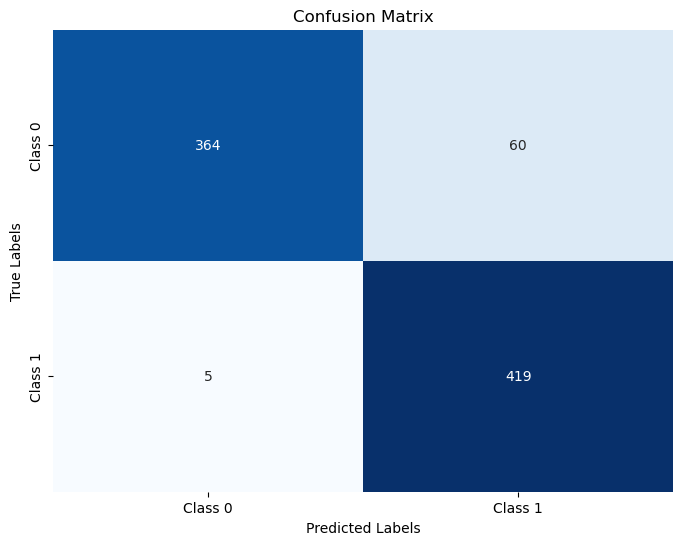

In [209]:
model_test(svm1, X_nt_smote, y_nt_smote)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


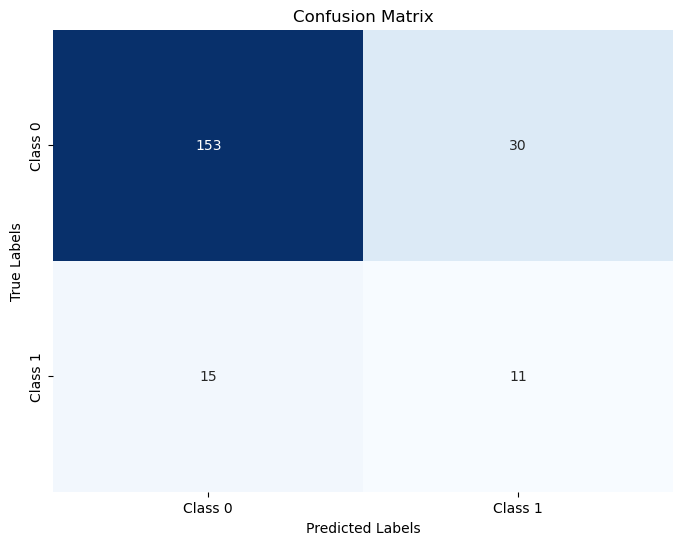

In [210]:
model_test(svm1)

In [108]:
# RECALL

In [211]:
param_grid1 = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 'auto'],
    'degree': [2, 3, 4, 5]
}

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
Time taken: 64.76499819755554 seconds
Best Hyperparameters: {'C': 0.0001, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       183
     Class 1       0.12      1.00      0.22        26

    accuracy                           0.12       209
   macro avg       0.06      0.50      0.11       209
weighted avg       0.02      0.12      0.03       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|         0 |       183 |
+-----------+-----------+
|         0 |        26 |
+-----------+-----------+


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


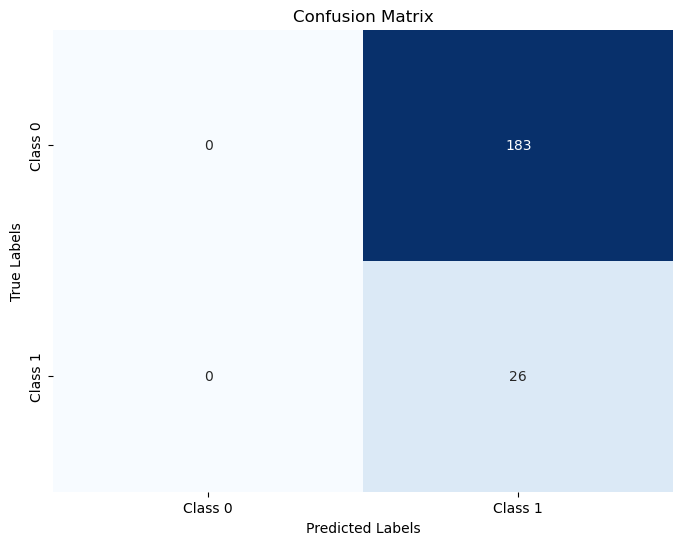

In [212]:
best_params1, best_svm1 = grid_searcher(param_grid1, svm1, 'recall')
model_test(best_svm1)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       1.00      0.01      0.02       424
     Class 1       0.50      1.00      0.67       424

    accuracy                           0.50       848
   macro avg       0.75      0.50      0.34       848
weighted avg       0.75      0.50      0.34       848

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|         4 |       420 |
+-----------+-----------+
|         0 |       424 |
+-----------+-----------+


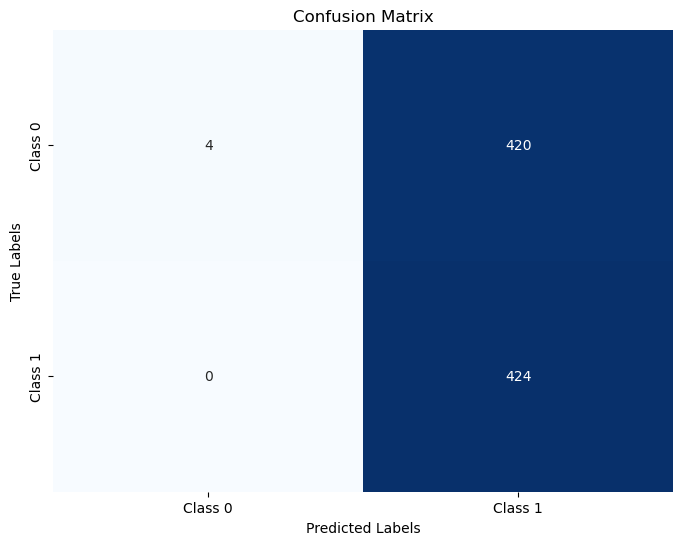

In [213]:
model_test(best_svm1, X_nt_smote, y_nt_smote)

In [214]:
param_grid2 = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 'auto'],
    # 'degree': [2, 3, 4, 5]
}

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Time taken: 13.892944097518921 seconds
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.93      0.91       183
     Class 1       0.29      0.19      0.23        26

    accuracy                           0.84       209
   macro avg       0.59      0.56      0.57       209
weighted avg       0.82      0.84      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


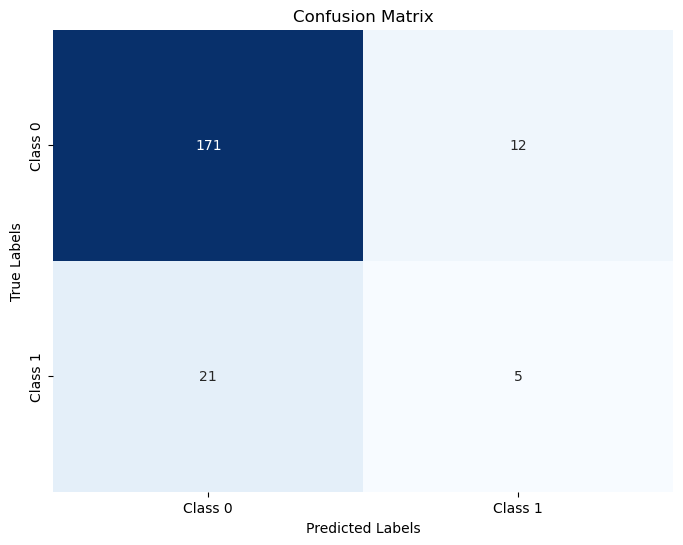

In [215]:
best_params2, best_svm2 = grid_searcher(param_grid2, svm1, 'recall')
model_test(best_svm2)

In [216]:
param_grid3 = {
    'C': [1, 2.5, 5, 8, 10, 20, 25, 40, 50, 75, 80, 90, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 'auto'],
    # 'degree': [2, 3, 4, 5]
}

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
Time taken: 52.83204531669617 seconds
Best Hyperparameters: {'C': 2.5, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.93      0.91       183
     Class 1       0.28      0.19      0.23        26

    accuracy                           0.84       209
   macro avg       0.58      0.56      0.57       209
weighted avg       0.81      0.84      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       170 |        13 |
+-----------+-----------+
|        21 |         5 |
+-----------+-----------+


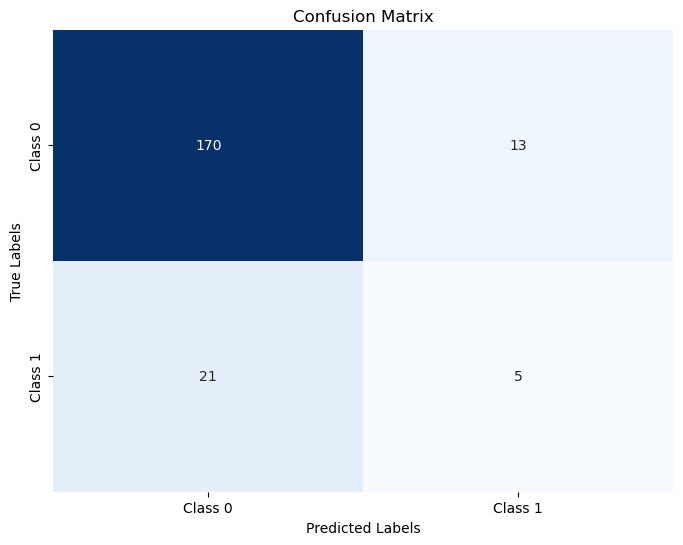

In [217]:
best_params3, best_svm3 = grid_searcher(param_grid3, svm1, 'recall')
model_test(best_svm3)

In [218]:
param_grid4 = {
    'kernel': ['linear', 'rbf', 'poly'],
}

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Time taken: 4.585784673690796 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


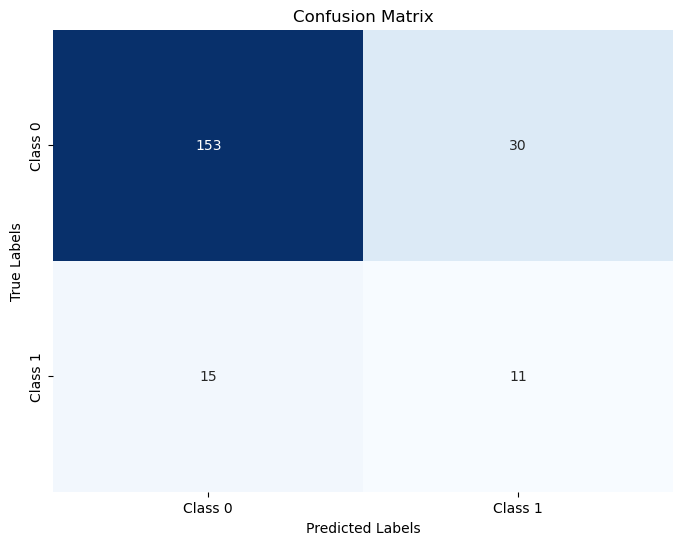

In [252]:
best_params4, best_svm4 = grid_searcher(param_grid4, svm1, 'recall', cv = 10)
model_test(best_svm4)

In [253]:
param_grid5 = {
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Time taken: 0.42622947692871094 seconds
Best Hyperparameters: {'C': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88       183
     Class 1       0.34      0.62      0.44        26

    accuracy                           0.80       209
   macro avg       0.64      0.72      0.66       209
weighted avg       0.86      0.80      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|        10 |        16 |
+-----------+-----------+


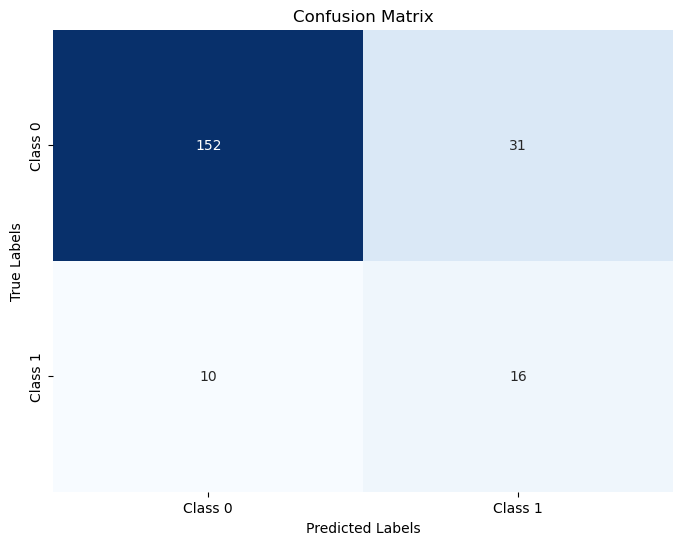

In [254]:
best_params5, best_svm5 = grid_searcher(param_grid5, best_svm4, 'recall', cv = 10)
model_test(best_svm5)

In [255]:
np.linspace(0.1, 1, 91)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  ])

Fitting 10 folds for each of 91 candidates, totalling 910 fits
Time taken: 4.073068380355835 seconds
Best Hyperparameters: {'C': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88       183
     Class 1       0.34      0.62      0.44        26

    accuracy                           0.80       209
   macro avg       0.64      0.72      0.66       209
weighted avg       0.86      0.80      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|        10 |        16 |
+-----------+-----------+


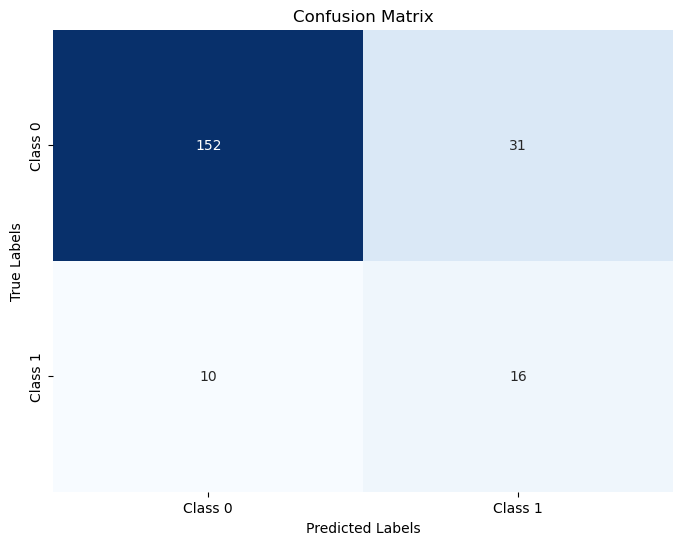

In [256]:
param_grid6 = {
    'C': list(np.linspace(0.01, 0.1, 91))
}
best_params6, best_svm6 = grid_searcher(param_grid6, best_svm5, 'recall', cv = 10)
model_test(best_svm6)

In [257]:
best_svm6.gamma

'scale'

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Time taken: 0.6570994853973389 seconds
Best Hyperparameters: {'gamma': 0.01}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.73      0.82       183
     Class 1       0.27      0.69      0.39        26

    accuracy                           0.73       209
   macro avg       0.61      0.71      0.61       209
weighted avg       0.86      0.73      0.77       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       134 |        49 |
+-----------+-----------+
|         8 |        18 |
+-----------+-----------+


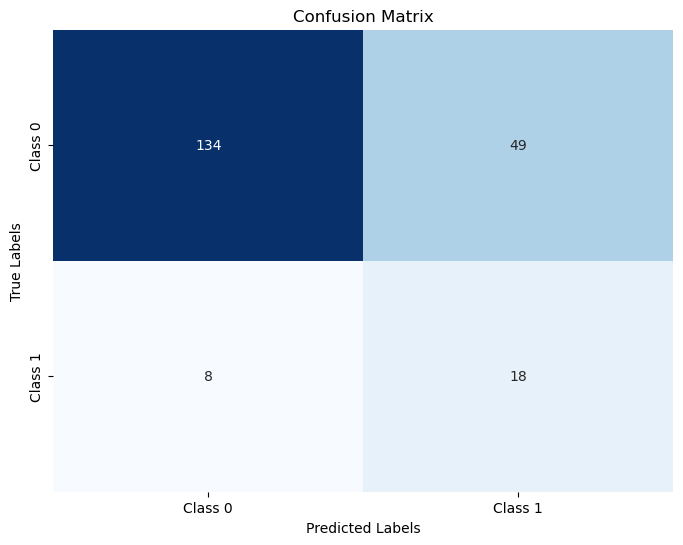

In [225]:
param_grid7 = {
    'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
}
best_params7, best_svm7 = grid_searcher(param_grid7, best_svm6, 'recall', cv = 10)
model_test(best_svm7)

In [226]:
# F1

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
Time taken: 64.86321687698364 seconds
Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 0.3, 'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.98      0.94       183
     Class 1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


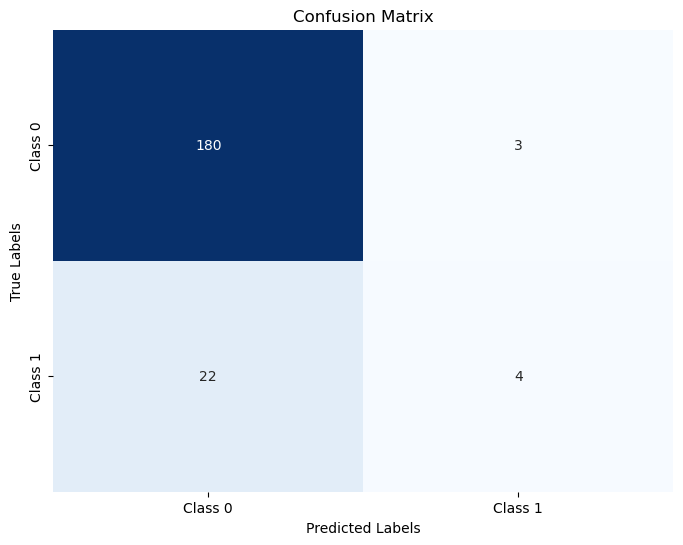

In [227]:
best_params1, best_svm1 = grid_searcher(param_grid1, svm1, 'f1')
model_test(best_svm1)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Time taken: 14.035533905029297 seconds
Best Hyperparameters: {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.98      0.94       183
     Class 1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       180 |         3 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


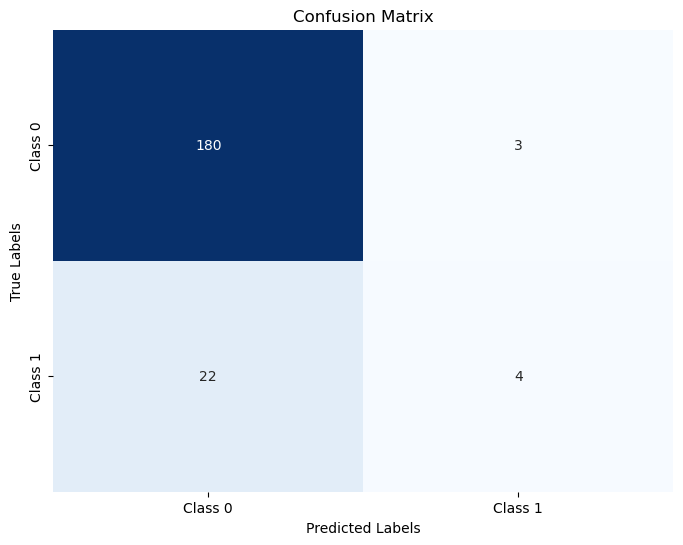

In [228]:
best_params2, best_svm2 = grid_searcher(param_grid2, svm1, 'f1')
model_test(best_svm2)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
Time taken: 51.30952429771423 seconds
Best Hyperparameters: {'C': 5, 'gamma': 0.3, 'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.98      0.93       183
     Class 1       0.50      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.70      0.57      0.58       209
weighted avg       0.84      0.88      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       179 |         4 |
+-----------+-----------+
|        22 |         4 |
+-----------+-----------+


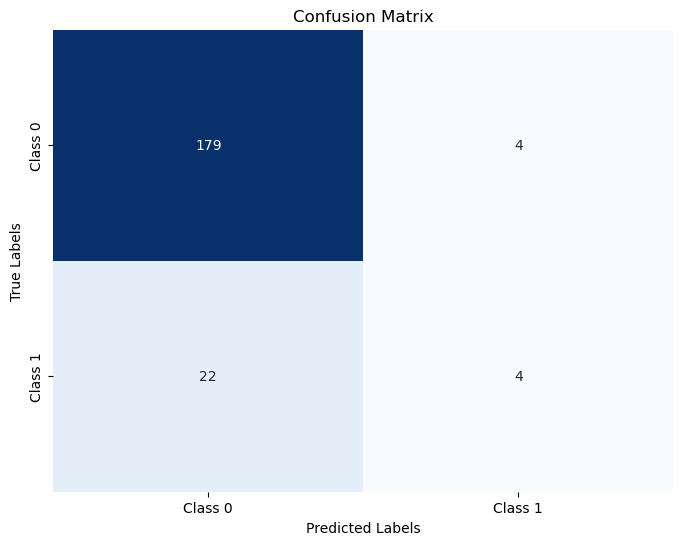

In [229]:
best_params3, best_svm3 = grid_searcher(param_grid3, svm1, 'f1')
model_test(best_svm3)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Time taken: 0.49559831619262695 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


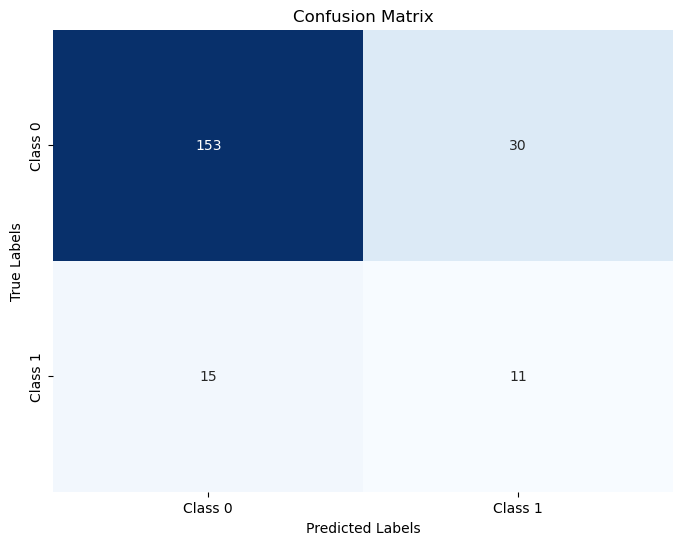

In [230]:
param_grid4 = {
    'kernel': ['linear', 'rbf', 'poly'],
}
best_params4, best_svm4 = grid_searcher(param_grid4, svm1, 'f1', cv = 10)
model_test(best_svm4)

Fitting 10 folds for each of 291 candidates, totalling 2910 fits
Time taken: 20.693026781082153 seconds
Best Hyperparameters: {'C': 0.29300000000000004}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.84      0.89       183
     Class 1       0.36      0.65      0.47        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.68       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


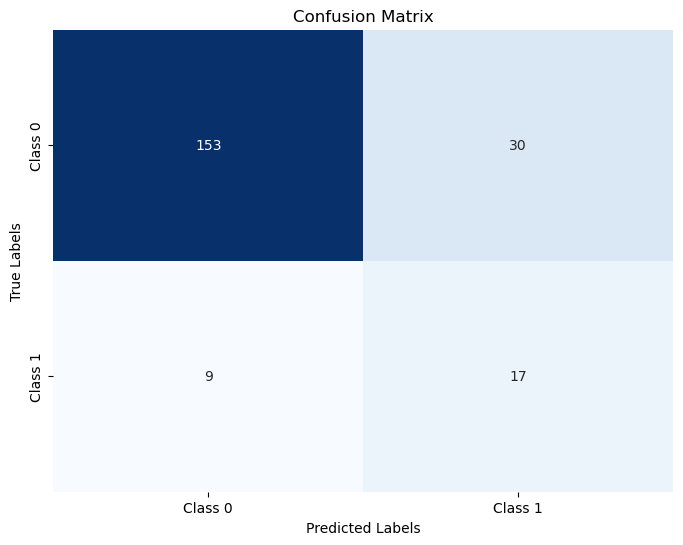

In [231]:
param_grid6 = {
    'C': list(np.linspace(0.01, 0.3, 291))
}
best_params6, best_svm6 = grid_searcher(param_grid6, best_svm5, 'f1', cv = 10)
model_test(best_svm6)

In [232]:
best_svm6.gamma

'scale'

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Time taken: 0.19709396362304688 seconds
Best Hyperparameters: {'gamma': 'scale'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.84      0.89       183
     Class 1       0.36      0.65      0.47        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.68       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


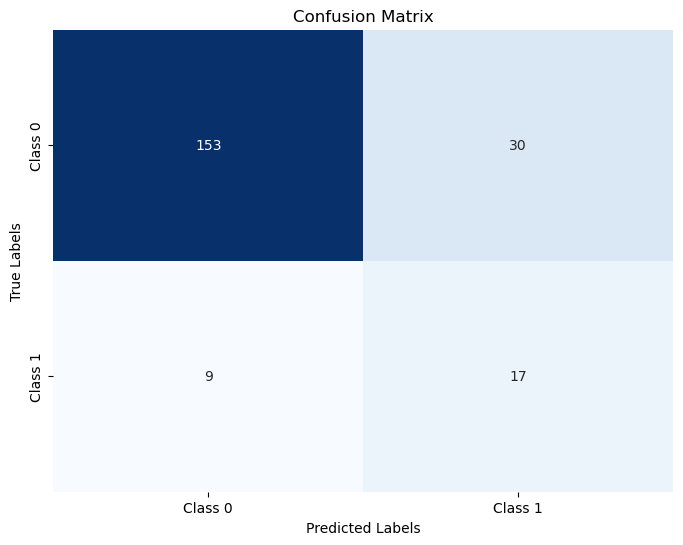

In [233]:
param_grid7 = {
    'gamma':['scale'] #, 'auto']
}
best_params7, best_svm7 = grid_searcher(param_grid7, best_svm6, 'f1', cv = 10)
model_test(best_svm7)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Time taken: 0.3001401424407959 seconds
Best Hyperparameters: {'kernel': 'poly'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.75      0.83       183
     Class 1       0.25      0.58      0.35        26

    accuracy                           0.73       209
   macro avg       0.59      0.67      0.59       209
weighted avg       0.84      0.73      0.77       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       138 |        45 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+


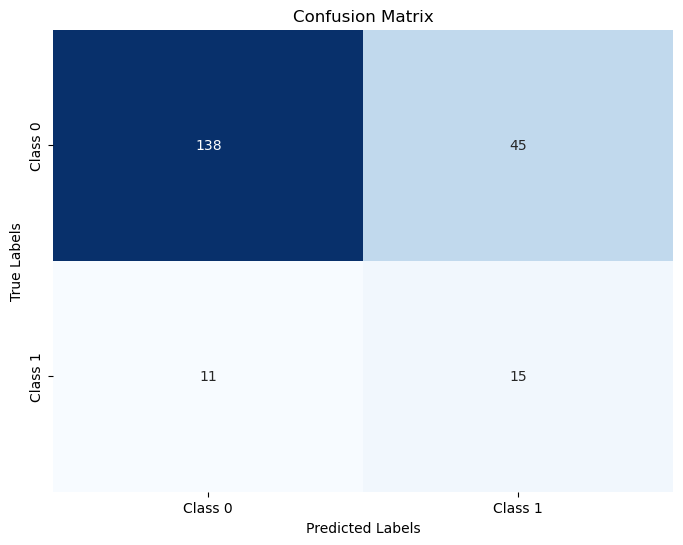

In [234]:
param_grid8 = {
    'kernel': ['linear', 'poly'],
}
best_params8, best_svm8 = grid_searcher(param_grid8, svm1, 'f1', cv = 10)
model_test(best_svm8)

Fitting 10 folds for each of 91 candidates, totalling 910 fits
Time taken: 5.26612114906311 seconds
Best Hyperparameters: {'C': 0.020999999999999998}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.29      0.44       183
     Class 1       0.14      0.85      0.25        26

    accuracy                           0.36       209
   macro avg       0.54      0.57      0.34       209
weighted avg       0.83      0.36      0.42       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|        53 |       130 |
+-----------+-----------+
|         4 |        22 |
+-----------+-----------+


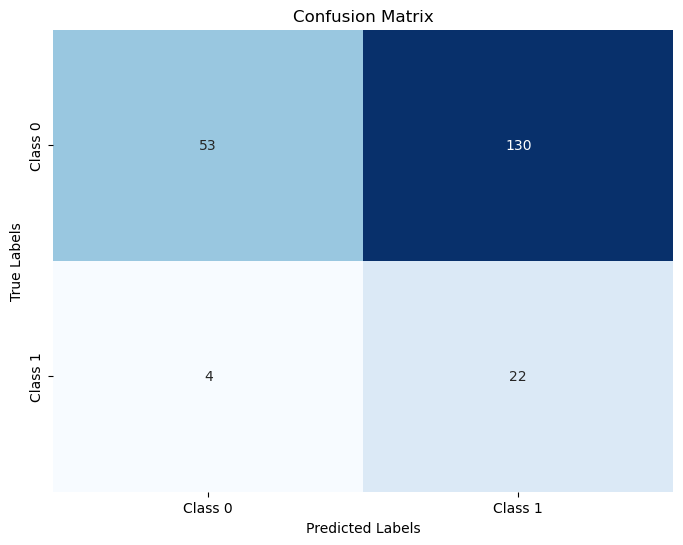

In [235]:
param_grid9 = {
    'C': list(np.linspace(0.01, 0.1, 91))
}
best_params9, best_svm9 = grid_searcher(param_grid9, best_svm8, 'f1', cv = 10)
model_test(best_svm9)

In [236]:
# POLY AND F1 ARE CRAP TOGETHER
# POLY SEEMS TO BE BAD IN GENERAL

In [251]:
# AVERAGE_PRECISION

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Time taken: 0.42559266090393066 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


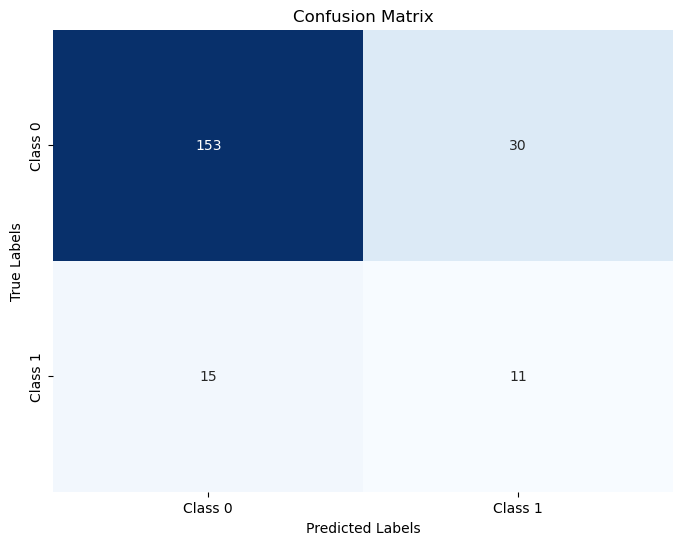

In [237]:
param_grid10 = {
    'kernel': ['linear', 'rbf', 'poly']
}
best_params10, best_svm10 = grid_searcher(param_grid10, svm1, 'average_precision', cv = 10)
model_test(best_svm10)

Fitting 10 folds for each of 291 candidates, totalling 2910 fits
Time taken: 20.6126651763916 seconds
Best Hyperparameters: {'C': 0.29300000000000004}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.84      0.89       183
     Class 1       0.36      0.65      0.47        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.68       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


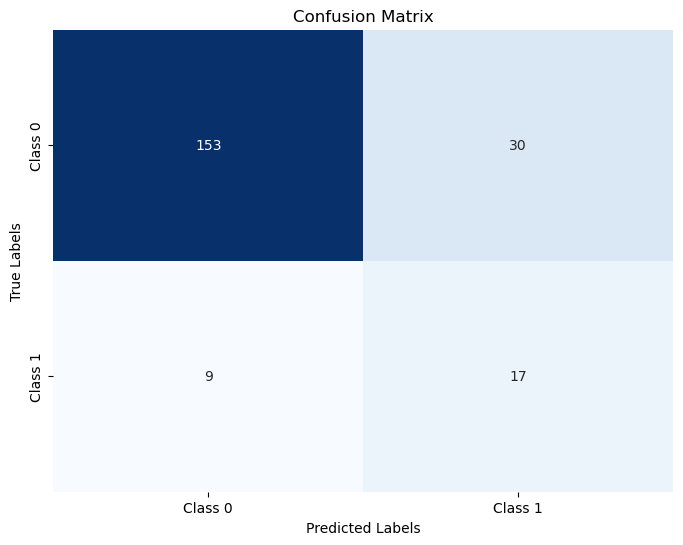

In [238]:
param_grid11 = {
    'C': list(np.linspace(0.01, 0.3, 291))
}
best_params11, best_svm11 = grid_searcher(param_grid11, best_svm10, 'f1', cv = 10)
model_test(best_svm11)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Time taken: 2.1526944637298584 seconds
Best Hyperparameters: {'gamma': 5}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.93       183
     Class 1       0.00      0.00      0.00        26

    accuracy                           0.88       209
   macro avg       0.44      0.50      0.47       209
weighted avg       0.77      0.88      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       183 |         0 |
+-----------+-----------+
|        26 |         0 |
+-----------+-----------+


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


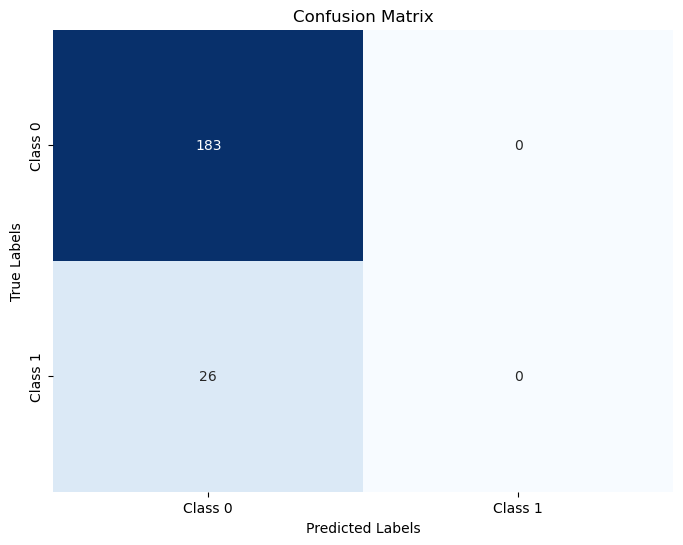

In [239]:
param_grid12 = {
    'gamma': [1e-4, 1e-5, 1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 2.5, 4, 5, 7.5, 8, 10, 12.5, 20, 'auto', 'scale'],
}
best_params12, best_svm12 = grid_searcher(param_grid12, best_svm11, 'average_precision', cv = 10)
model_test(best_svm12)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Time taken: 0.44992780685424805 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


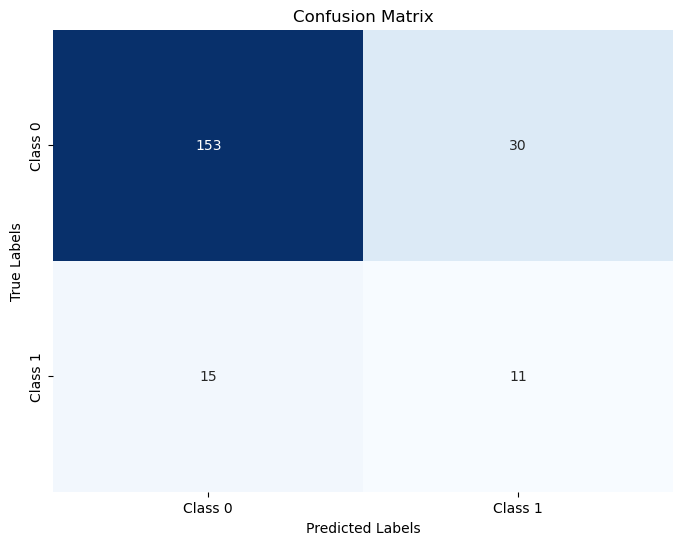

In [240]:
param_grid13 = {
    'kernel': ['linear', 'rbf', 'poly']
}
best_params13, best_svm13 = grid_searcher(param_grid13, svm1, 'roc_auc', cv = 10)
model_test(best_svm13)

Fitting 10 folds for each of 291 candidates, totalling 2910 fits
Time taken: 19.55275797843933 seconds
Best Hyperparameters: {'C': 0.3}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88       183
     Class 1       0.35      0.65      0.46        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.67       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


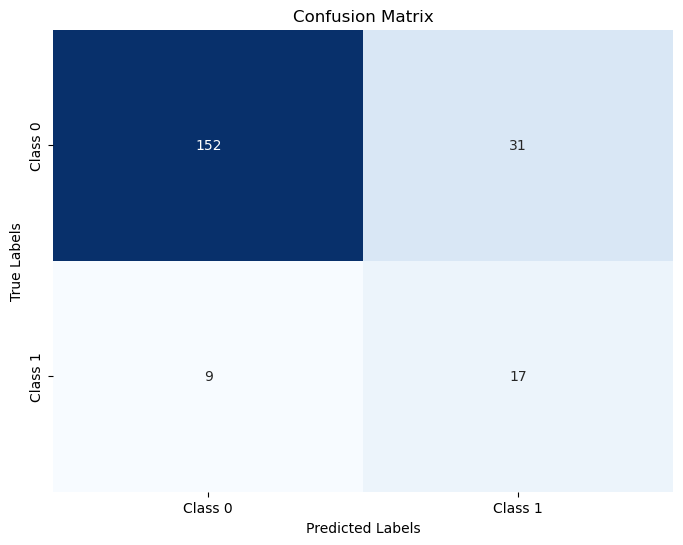

In [241]:
param_grid14 = {
    'C': list(np.linspace(0.01, 0.3, 291))
}
best_params14, best_svm14 = grid_searcher(param_grid14, best_svm13, 'roc_auc', cv = 10)
model_test(best_svm14)

In [260]:
best_svm14.gamma

'scale'

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Time taken: 0.27691054344177246 seconds
Best Hyperparameters: {'gamma': 'scale'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88       183
     Class 1       0.35      0.65      0.46        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.67       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


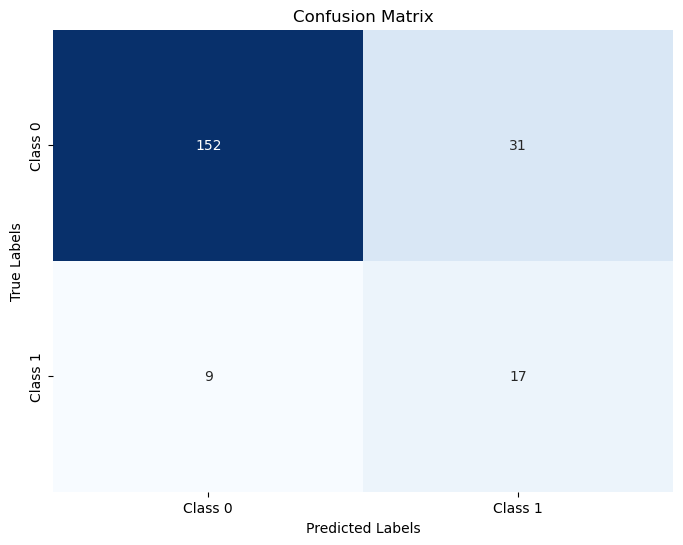

In [242]:
param_grid15 = {
    # 'gamma': [1e-4, 1e-5, 1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 2.5, 4, 5, 7.5, 8, 10, 12.5, 20, 'auto', 'scale'],
    'gamma': ['scale', 'auto']
}
best_params15, best_svm15 = grid_searcher(param_grid15, best_svm14, 'roc_auc', cv = 10)
model_test(best_svm15)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Time taken: 0.42486572265625 seconds
Best Hyperparameters: {'kernel': 'rbf'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.87       183
     Class 1       0.27      0.42      0.33        26

    accuracy                           0.78       209
   macro avg       0.59      0.63      0.60       209
weighted avg       0.83      0.78      0.80       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|        15 |        11 |
+-----------+-----------+


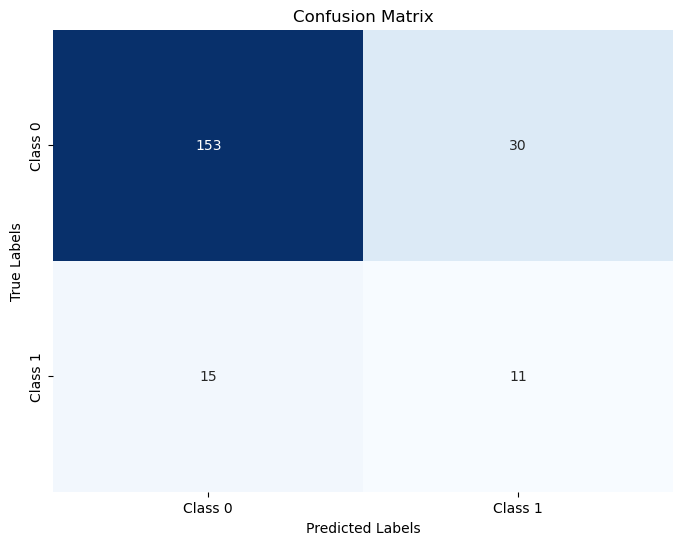

In [243]:
param_grid16 = {
    'kernel': ['linear', 'rbf', 'poly']
}
best_params16, best_svm16 = grid_searcher(param_grid16, svm1, 'matthews_corrcoef', cv = 10)
model_test(best_svm16)

Fitting 10 folds for each of 291 candidates, totalling 2910 fits
Time taken: 18.976346731185913 seconds
Best Hyperparameters: {'C': 0.29300000000000004}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.84      0.89       183
     Class 1       0.36      0.65      0.47        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.68       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       153 |        30 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


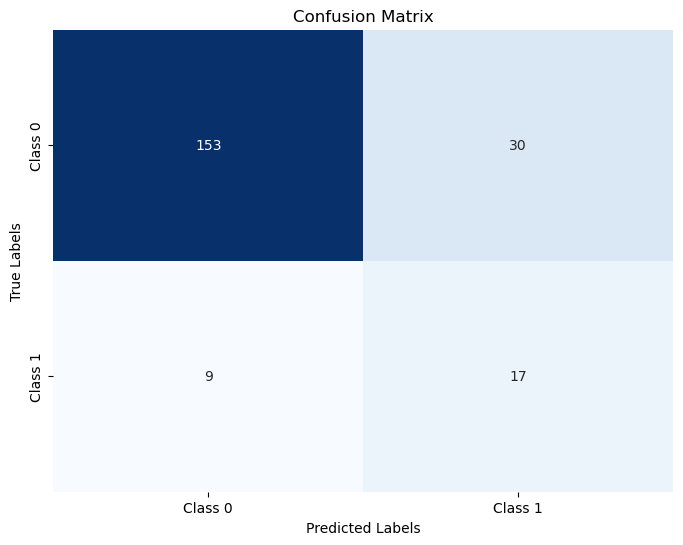

In [244]:
param_grid17 = {
    'C': list(np.linspace(0.01, 0.3, 291))
}
best_params17, best_svm17 = grid_searcher(param_grid17, best_svm16, 'matthews_corrcoef', cv = 10)
model_test(best_svm17)

In [245]:
best_svm16.gamma

'scale'

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Time taken: 0.33803343772888184 seconds
Best Hyperparameters: {'gamma': 'scale'}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.94      0.83      0.88       183
     Class 1       0.35      0.65      0.46        26

    accuracy                           0.81       209
   macro avg       0.65      0.74      0.67       209
weighted avg       0.87      0.81      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|         9 |        17 |
+-----------+-----------+


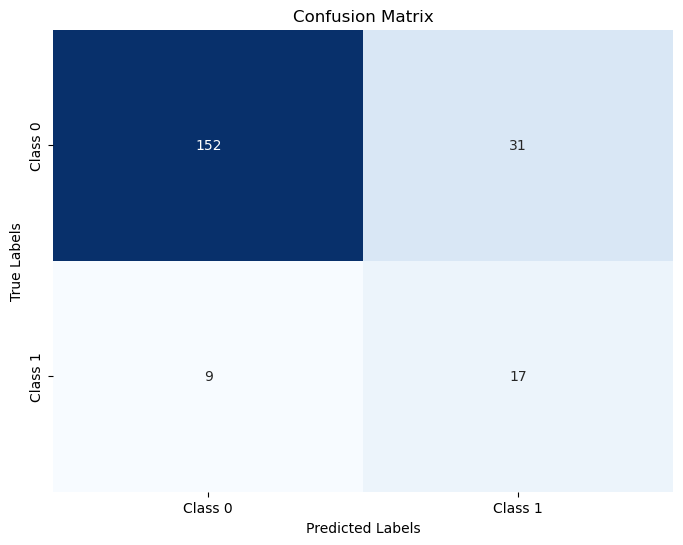

In [246]:
param_grid18 = {
    # 'gamma': [1e-4, 1e-5, 1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.7, 0.9, 1, 2.5, 4, 5, 7.5, 8, 10, 12.5, 20, 'auto', 'scale'],
    'gamma': ['scale', 'auto']
}
best_params18, best_svm18 = grid_searcher(param_grid15, best_svm14, 'matthews_corrcoef', cv = 10)
model_test(best_svm18)

In [247]:
# XGBOOST------------------------------------------------------------------------------------------------------------------------------------------------

In [248]:
xg1 = XGBClassifier(random_state = 42)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


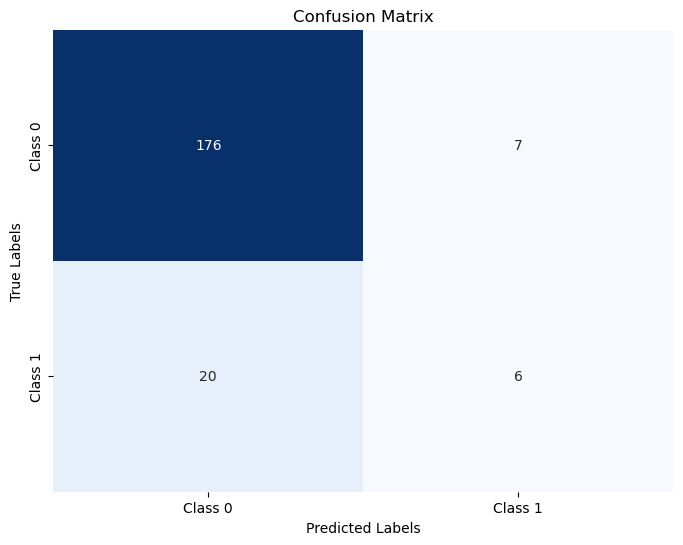

In [249]:
xg1.fit(X_nt_smote, y_nt_smote)
model_test(xg1)

Fitting 5 folds for each of 2340 candidates, totalling 11700 fits
Time taken: 170.03135538101196 seconds
Best Hyperparameters: {'learning_rate': 0.055, 'max_depth': 6, 'n_estimators': 100, 'reg_lambda': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.94      0.93       183
     Class 1       0.48      0.38      0.43        26

    accuracy                           0.87       209
   macro avg       0.70      0.66      0.68       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        16 |        10 |
+-----------+-----------+


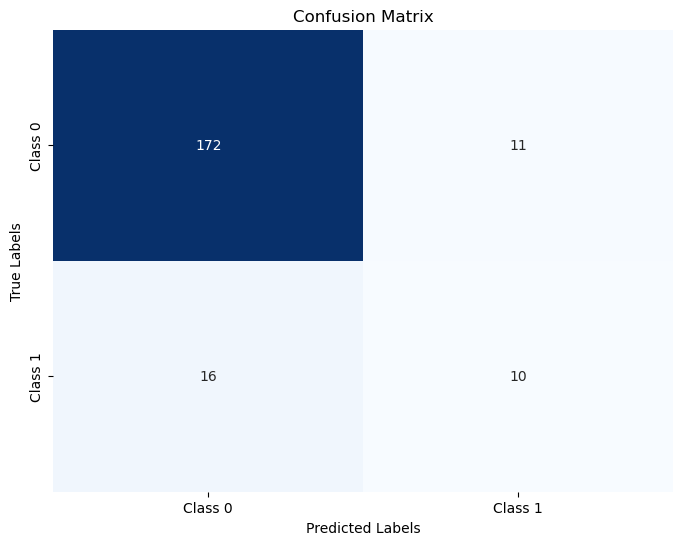

In [250]:
param_grid1 = {
    'learning_rate': np.linspace(0.01, 0.2, 39),
    'n_estimators': [75, 100, 125, 150, 175],
    'max_depth': [3, 4, 5, 6],
    'reg_lambda': [1, 1.5, 2]
}
best_params1, best_model1 = grid_searcher(param_grid1, xg1, 'recall')
model_test(best_model1)